In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import random as random
from sklearn import linear_model

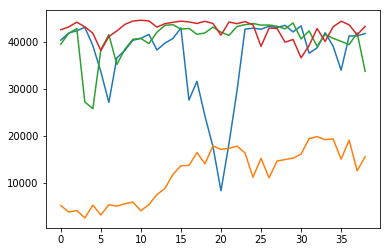

In [2]:

# Import and visualize the data
raw_data = np.genfromtxt('data/client_performance.csv', delimiter=";", dtype=float, encoding="utf-8-sig")
number_of_measurements = len(raw_data[0])

# Visualize on plot
fig = plt.figure()
ax = plt.axes()
x = range(len(raw_data))

for client in range(number_of_measurements):
    ax.plot(x, [i[client] for i in raw_data])


In [3]:
# Format the data into feature and values
# Settings
min_history = 2
max_history = 5

# Data array will contain data from each history length
data = []

for history_length in range(min_history + 1, max_history + 2):
    history_data = []
    for measurement in range(number_of_measurements):
        measurement_data = raw_data[:, measurement]
        for value_to_predict in range(history_length, len(measurement_data)):
            history_data.append(measurement_data[value_to_predict - history_length:value_to_predict])
    # Shuffle the data points (vectors, not individual measurements!)
    random.shuffle(history_data)
    data.append(history_data)

History is  2
Average error is 2585.560774 (7.929938 %)
History is  3
Average error is 2541.408919 (8.068892 %)
History is  4
Average error is 2683.538435 (7.854169 %)
History is  5
Average error is 2925.725514 (9.024087 %)


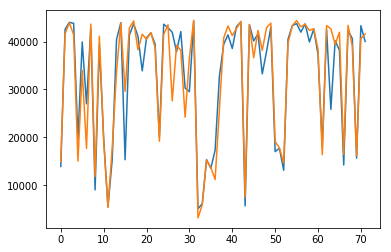

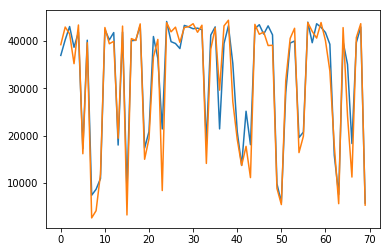

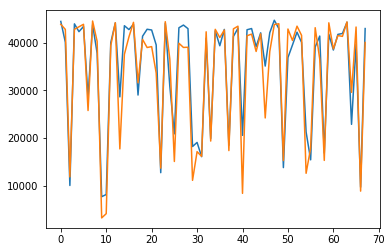

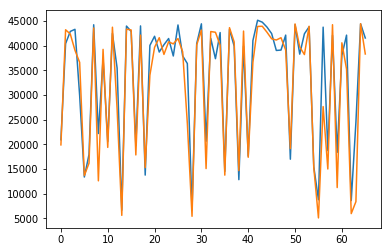

In [10]:
# Learning
training_percentage = 0.5

for data_set in data:
    cutting_point = math.floor(len(data_set) * training_percentage)
    training_set = np.asarray(data_set[:cutting_point])
    validation_set = np.asarray(data_set[cutting_point:])

    value_column = len(training_set[0]) - 1
    model = linear_model.LinearRegression()
    model.fit(training_set[:, list(range(0, value_column))], training_set[:, value_column])
    prediction = model.predict(validation_set[:, list(range(0, value_column))])

    # Print the accuracy
    sum_error = 0
    sum_data = 0
    for i in range(len(validation_set)):
        sum_error += math.fabs(prediction[i] - validation_set[i][value_column])
        sum_data += validation_set[i][0]

    average_error = sum_error / len(validation_set)
    average_data = sum_data / len(validation_set)

    print("History is ", len(data_set[0]) - 1)
    print("Average error is %f (%f %%)" % (average_error, average_error / average_data * 100))

    # Plot the result
    fig = plt.figure()
    ax = plt.axes()
    x_validate = range(len(prediction))

    # Plot predicted
    ax.plot(x_validate, prediction)

    # Plot actual
    ax.plot(x_validate, validation_set[:, value_column])
